# Reconstruct Itinerary

ou are given a list of airline tickets where tickets[i] = [fromi, toi] represent the departure and the arrival airports of one flight. Reconstruct the itinerary in order and return it.

All of the tickets belong to a man who departs from "JFK", thus, the itinerary must begin with "JFK". If there are multiple valid itineraries, you should return the itinerary that has the smallest lexical order when read as a single string.

For example, the itinerary ["JFK", "LGA"] has a smaller lexical order than ["JFK", "LGB"].
You may assume all tickets form at least one valid itinerary. You must use all the tickets once and only once.

 

**Example 1:**

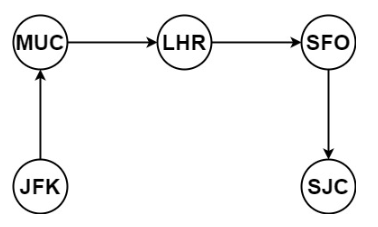

Input: tickets = [["MUC","LHR"],["JFK","MUC"],["SFO","SJC"],["LHR","SFO"]]
Output: ["JFK","MUC","LHR","SFO","SJC"]

**Example 2:**

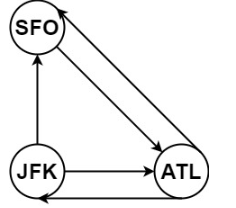

Input: tickets = [["JFK","SFO"],["JFK","ATL"],["SFO","ATL"],["ATL","JFK"],["ATL","SFO"]]
Output: ["JFK","ATL","JFK","SFO","ATL","SFO"]
Explanation: Another possible reconstruction is ["JFK","SFO","ATL","JFK","ATL","SFO"] but it is larger in lexical order.
 

**Constraints:**

1 <= tickets.length <= 300
tickets[i].length == 2
fromi.length == 3
toi.length == 3
fromi and toi consist of uppercase English letters.
fromi != toi

In [1]:
from collections import defaultdict

def findItinerary(tickets):
    # Build a graph using a defaultdict
    graph = defaultdict(list)
    for departure, arrival in tickets:
        graph[departure].append(arrival)
    
    # Sort the destinations in lexical order
    for departure in graph:
        graph[departure].sort()
    
    # Initialize the itinerary list
    itinerary = []
    
    # Recursive DFS function
    def dfs(departure):
        while graph[departure]:
            dfs(graph[departure].pop(0))
        itinerary.append(departure)
    
    # Start DFS from "JFK"
    dfs("JFK")
    
    # Reverse the itinerary to get the correct order
    return itinerary[::-1]

In [2]:
# Example 1
tickets1 = [["MUC","LHR"],["JFK","MUC"],["SFO","SJC"],["LHR","SFO"]]
print(findItinerary(tickets1))
# Output: ["JFK","MUC","LHR","SFO","SJC"]

# Example 2
tickets2 = [["JFK","SFO"],["JFK","ATL"],["SFO","ATL"],["ATL","JFK"],["ATL","SFO"]]
print(findItinerary(tickets2))
# Output: ["JFK","ATL","JFK","SFO","ATL","SFO"]

['JFK', 'MUC', 'LHR', 'SFO', 'SJC']
['JFK', 'ATL', 'JFK', 'SFO', 'ATL', 'SFO']
